### Dataset Description

Hitters data set contains information on Major League Baseball. Among other 
information, it contains annual salary of baseball players (in thousands of dollars) on 
opening day of the season.

### Load required Packages

In [1]:
# import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from dmba import regressionSummary, exhaustive_search
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from dmba import plotDecisionTree, classificationSummary, regressionSummary

Q. 1 Remove the observations with unknown salary information. How many observations were removed in this process?

In [2]:
hitters_df = pd.read_csv('Hitters.csv')
print(hitters_df)

     AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  \
0      293    66      1    30   29     14      1     293     66       1   
1      315    81      7    24   38     39     14    3449    835      69   
2      479   130     18    66   72     76      3    1624    457      63   
3      496   141     20    65   78     37     11    5628   1575     225   
4      321    87     10    39   42     30      2     396    101      12   
..     ...   ...    ...   ...  ...    ...    ...     ...    ...     ...   
317    497   127      7    65   48     37      5    2703    806      32   
318    492   136      5    76   50     94     12    5511   1511      39   
319    475   126      3    61   43     52      6    1700    433       7   
320    573   144      9    85   60     78      8    3198    857      97   
321    631   170      9    77   44     31     11    4908   1457      30   

     CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary  \
0       30    29     

In [3]:
# removing rows will null values
df = hitters_df.dropna()
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


Ans: There are total of 322 observations in the dataset.
After removing unknown salary information, there are 263 rows left in the dataset.

Q. 2 Transform the salaries using a (natural) log transformation. Is there any 
justification for this transformation? Explain your answer.

Step 1: Before applying any transformation:

<AxesSubplot:xlabel='Salary', ylabel='Count'>

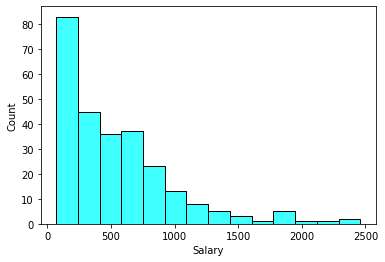

In [11]:
sns.histplot(data=hitters_df, x='Salary', color = 'cyan')

Before applying any transformation on Salary column, the distribution of the plot is right-skewed.

After applying log transformation:

In [4]:
# Calculate natural logarithm on 'Salary' column
hitters_df=pd.read_csv('Hitters.csv')
hitters_df['natural_log'] = np.log(hitters_df['Salary'])
# Show the dataframe
hitters_df['natural_log']

0           NaN
1      6.163315
2      6.173786
3      6.214608
4      4.516339
         ...   
317    6.551080
318    6.774224
319    5.953243
320    6.866933
321    6.907755
Name: natural_log, Length: 322, dtype: float64

<AxesSubplot:xlabel='Log Salary', ylabel='Count'>

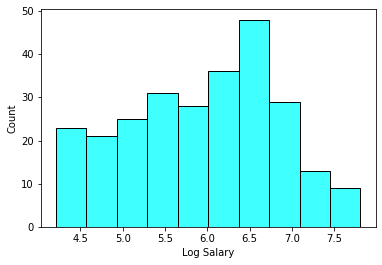

In [10]:
hitters_df['Log Salary'] = np.log(hitters_df['Salary'])

hitters_df2= np.log(hitters_df['Salary'])
# Show the dataframe

sns.histplot(data=hitters_df['Log Salary'], color = 'cyan')

After applying log transformation on Salary column, the distribution of the plot is no longer skewed, and it shows closer to normally distributed.

In [5]:
#crrate a copy of dataset with log(Salary) column and use it further
hitters_df_dropped = hitters_df.dropna()
hitters_df2 = hitters_df_dropped['Salary'].copy()
temp_hitters_df = np.log(hitters_df2)
# temp_hitters_df now stores the log(Salary) values in it

hitters_df_updated = hitters_df_dropped.copy()
hitters_df_updated['Salary'] = temp_hitters_df
hitters_df_updated

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,natural_log
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,N,W,632,43,10,6.163315,N,6.163315
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,A,W,880,82,14,6.173786,A,6.173786
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,N,E,200,11,3,6.214608,N,6.214608
4,321,87,10,39,42,30,2,396,101,12,...,46,33,N,E,805,40,4,4.516339,N,4.516339
5,594,169,4,74,51,35,11,4408,1133,19,...,336,194,A,W,282,421,25,6.620073,A,6.620073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,...,311,138,N,E,325,9,3,6.551080,N,6.551080
318,492,136,5,76,50,94,12,5511,1511,39,...,451,875,A,E,313,381,20,6.774224,A,6.774224
319,475,126,3,61,43,52,6,1700,433,7,...,93,146,A,W,37,113,7,5.953243,A,5.953243
320,573,144,9,85,60,78,8,3198,857,97,...,420,332,A,E,1314,131,12,6.866933,A,6.866933


The hitters_df_updated data set now contains the 263 rows with Salary column converted to Log scale

Q. 3 Create a scatterplot with Hits on the y-axis and Years on the x-axis using all the observations. Color code the observations using the log Salary variable. What patterns do you notice on this chart, if any?

<AxesSubplot:xlabel='Years', ylabel='Hits'>

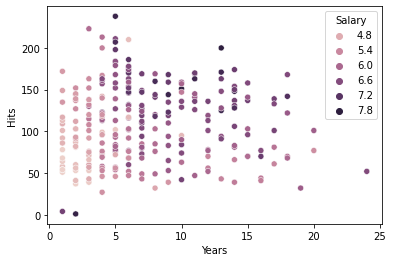

In [50]:
sns.scatterplot(data=hitters_df_updated, x='Years', y= 'Hits', hue='Salary')

After plotting the scatterplot on given variables, the plotted graph shows the below observation:
When the value of years is less and the no. of hits is also small, the salary (here, log(Salary)) value is low. This indicates to a conclusion that the Salary increases as a player plays for more years and scores more hits.


Q. 4 Run a linear regression model of Log Salary on all the predictors using the entire dataset. Use an exhaustive search model. Which predictor variables are included in the (best) model?

In [6]:
predictors = ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI','Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns','CRBI','CWalks','League','Division','PutOuts',
'Assists','Errors','NewLeague']
outcome = 'Salary'


X = pd.get_dummies(hitters_df_updated[predictors], drop_first=True)
y = hitters_df_updated[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
hitters_df_updated.dropna()
hitters_df_updated.shape
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 200)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')


print(pd.DataFrame(data).columns)

     n     r2adj         AIC  Assists  AtBat  CAtBat  CHits  CHmRun   CRBI  CRuns  ...  Errors   Hits  HmRun  League_N  NewLeague_N  PutOuts    RBI   Runs  Walks  Years
0    1  0.389994  456.467828    False  False   False   True   False  False  False  ...   False  False  False     False        False    False  False  False  False  False
1    2  0.517696  408.128083    False  False   False  False   False  False  False  ...   False   True  False     False        False    False  False  False  False   True
2    3  0.528852  404.196572    False  False   False  False   False  False  False  ...   False   True  False     False        False    False  False  False  False   True
3    4  0.538044  401.036849    False  False   False  False   False  False  False  ...   False   True  False     False        False    False  False  False   True   True
4    5  0.543822  399.367065    False  False   False  False   False  False  False  ...   False   True  False     False        False     True  False  False 

After the exhaustive search model run, we use the criteria like Adjusted R-square, AIC values. 
Low AIC and High Adjusted R-square are desired.
For n=10, lowest AIC and highest adjusted R-square are obtained. So, we select the 10 variables.
Those are: 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists','CAtBat', 'CHits', 'CHmRun', 'Errors', 'League_N'

Q. 5 Now create a training data set consisting of 80 percent of the observations, and a test data set consisting of the remaining 20 percent of the observations.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
262,275,68,5,42,42,61,6,961,238,16,128,104,172,181,3,2,1,0,1
304,172,42,3,17,14,15,10,4086,1150,57,579,363,406,65,0,0,1,1,1
131,220,54,10,30,39,31,5,1185,299,40,145,154,128,50,136,20,1,0,1
25,587,163,4,92,51,70,6,2695,747,17,442,198,317,434,9,3,0,0,0
201,216,54,2,27,25,33,1,216,54,2,27,25,33,317,36,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,343,103,6,48,36,40,15,4338,1193,70,581,421,325,211,56,13,0,0,0
112,490,125,24,81,105,62,13,6063,1646,271,847,999,680,869,62,8,1,0,1
20,413,92,16,72,48,65,1,413,92,16,72,48,65,280,9,5,1,0,1
284,562,169,17,88,73,53,8,3181,841,61,450,342,373,351,442,17,0,0,0


In [14]:
X_test

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
37,268,60,5,24,25,15,2,350,78,5,34,29,18,442,59,6,1,1,1
95,382,119,13,54,58,36,12,2133,594,41,287,294,227,59,156,9,1,1,1
312,387,124,1,67,27,36,7,1775,506,6,272,125,194,186,290,17,1,0,1
212,209,54,3,25,14,12,1,209,54,3,25,14,12,102,6,3,0,1,0
255,246,76,5,35,39,13,6,912,234,12,102,96,80,44,0,1,0,0,0
247,341,110,9,45,49,46,9,2331,658,50,249,322,274,251,9,4,0,0,0
115,596,171,34,91,108,52,6,2862,728,107,361,401,224,118,334,21,0,1,0
309,600,139,0,94,29,60,2,1236,309,1,201,69,110,300,12,9,1,0,1
28,550,152,6,92,37,81,5,2308,633,32,349,182,308,262,329,16,1,1,1
56,244,58,9,28,25,35,4,1335,333,49,164,179,194,142,14,2,1,1,1


Q. 6 Generate a regression tree of log Salary using only Years and Hits variables from the training data set. Which players are likely to receive highest salaries according to this model? Write down the rule and elaborate on it.

Overall MSE:  0.6817552421969316

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.4229
            Mean Absolute Error (MAE) : 0.3276
          Mean Percentage Error (MPE) : -0.4985
Mean Absolute Percentage Error (MAPE) : 5.5303

Regression statistics

                      Mean Error (ME) : 0.0587
       Root Mean Squared Error (RMSE) : 0.8257
            Mean Absolute Error (MAE) : 0.5160
          Mean Percentage Error (MPE) : -0.2332
Mean Absolute Percentage Error (MAPE) : 8.7836


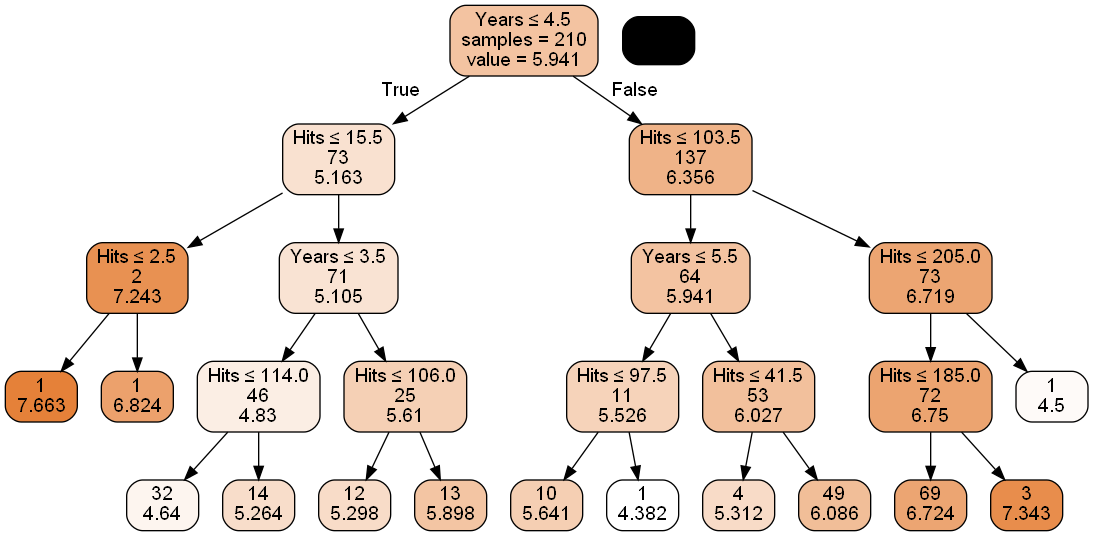

In [9]:
# Using only Years and Hits variables from the training data set
X_train_Q6 = X_train.loc[:, ['Hits', 'Years']]
X_test_Q6 = X_test.loc[:, ['Hits', 'Years']]

regQ6 = DecisionTreeRegressor(max_depth= 4, random_state=123)
modelQ6 = regQ6.fit(X_train_Q6, y_train)
predQ6 = regQ6.predict(X_test_Q6)
modelQ6_mse = mean_squared_error(predQ6, y_test)
print('Overall MSE: ', modelQ6_mse)

regressionSummary(y_train, regQ6.predict(X_train_Q6))
regressionSummary(y_test, regQ6.predict(X_test_Q6))

plotDecisionTree(regQ6, feature_names= X_train_Q6.columns)



Analysis: Based on the graph above,players are likely to receive highest salaries according to the model:
1. 1st Rule: if (‘Years’ <= 4.5) and (‘Hits’ <= 2.5), then salary = 7.663 (count = 1)
2. 2nd Rule: if (‘Years’ <= 4.5) and (2.5 < ‘Hits’ <= 15.5), then salary = 6.824 (count = 1)
3. 3rd Rule: if (‘Years’ > 4.5) and (103.5 < ‘Hits’ <= 185.0), then salary = 6.724 (count = 69)
4. 4th Rule: if ('Years' > 4.5) and ('Hits' > 185.0), then the salary = 7.343 (count = 3)

Q. 7 Now create a regression tree using all the variables in the training data set. Perform boosting on the training set with 1,000 trees. Print the MSE from the test data set.

In [47]:
#Perform boosting on the training set with 1,000 trees
boosted= GradientBoostingRegressor(n_estimators=1000, random_state=123)
boosted.fit(X_train, y_train)
boosted_pred= boosted.predict(X_test)
mse= mean_squared_error(boosted_pred, y_test)
mse
print('MSE value for boosting the training set: ', round(mse,4))

MSE value for boosting the training set:  0.2906


Q. 8 Which variables appear to be the most important predictors in the boosted model? 

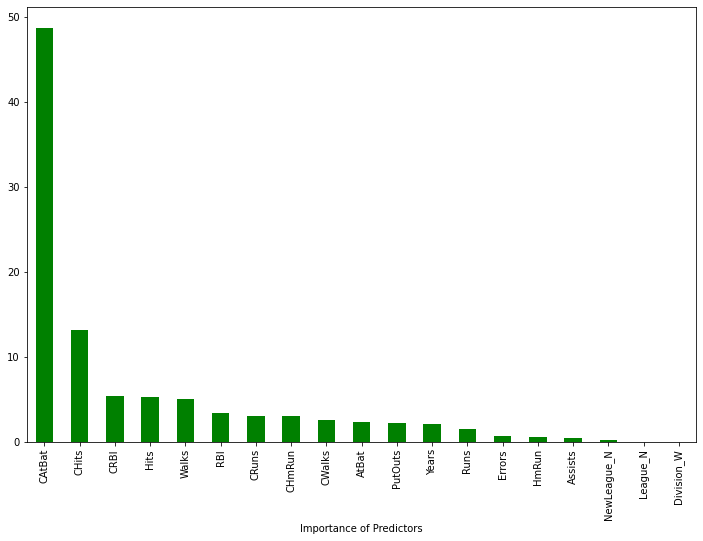

In [42]:
boosted = pd.DataFrame({'Importance of Predictors': reg_boosting.feature_importances_*100}, index=X.columns)
boosted.sort_values('Importance of Predictors', ascending=False).plot(kind='bar', color='g', figsize=(12, 8))
plt.xlabel('Importance of Predictors')
plt.gca().legend_ = None

Using the results from above graph output, CAtBat predictor is the most important predictor almost as high as 50%.
Other 4 significant predictors are CHits, CRBI, Hits and Walks in same order.

Q. 9 Now apply bagging to the training set. What is the test set MSE for this approach?

In [45]:
bagging = RandomForestRegressor(max_features=19, random_state=123)
bagging.fit(X_train, y_train)
predict = bagging.predict(X_test)
mse = mean_squared_error(predict, y_test)
print('MSE value for bagging the training set: ', round(mse,4))

MSE value for bagging the training set:  0.2401


Q. 10 Which variables appear to be the most important predictors in the bagging model?

Text(0.5, 0, 'Importance of Predictors')

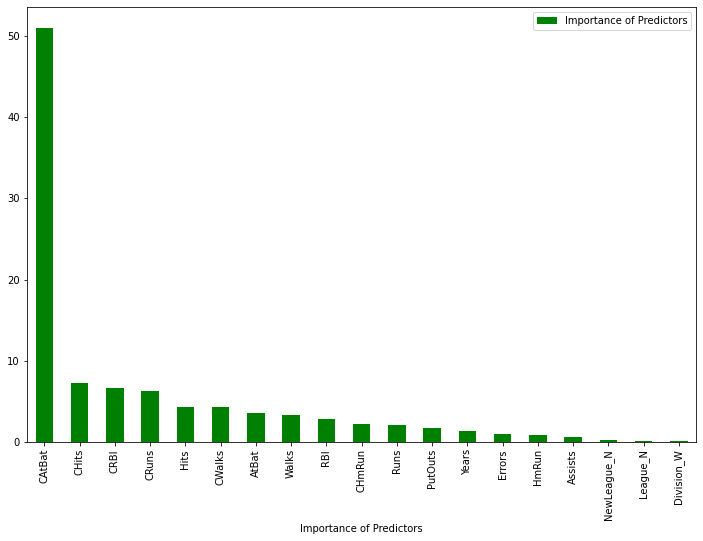

In [44]:
# Variables as most important predictors in the bagging model
bagging_featureImportance = pd.DataFrame({'Importance of Predictors': reg_bagging.feature_importances_*100}, index=X.columns)
bagging_featureImportance.sort_values('Importance of Predictors', ascending=False).plot(kind='bar', color='g', figsize = (12,8))

plt.xlabel('Importance of Predictors')

Using the results from above graph output, CAtBat predictor is the most important predictor as high as 50%.
Other 4 significant predictors are CHits, CRBI, CRuns and Hits in same order.